                    SPECIFIC OBJECTIVES

i.To identify high-risk populations for focused mental health treatments.

ii.To identify relevant features in social media data that are indicative of mental health
disorders.

iii. To develop and train a machine learning model to predict early signs of mental health
issues based on social media posts.

iv. To evaluate the performance of the prediction model through metrics such as accuracy,
precision, recall, and F1 score, ensuring the model’s ability to correctly identify
individuals at risk

Importing Necessary Libraries

This project utilizes key Python libraries for data analysis, visualization, and NLP. pandas handles structured data, while numpy supports numerical operations. matplotlib and seaborn create insightful visualizations. wordcloud helps generate word frequency clouds, and re (regular expressions) aids in text processing. For NLP, nltk provides tools like stopwords (removes common words), word_tokenize (splits text), and WordNetLemmatizer (converts words to their root forms). These libraries streamline data analysis and natural language processing tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

This code reads the Mental-Health-Twitter.csv file into a pandas DataFrame and displays the first five rows.



In [2]:
df = pd.read_csv("E:/Downloads/Mental-Health-Twitter.csv")
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


Dataset Information

This command provides a summary of the dataset, including the number of entries, column names, data types, and missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


Statistical Summary of the Dataset

This command returns descriptive statistics for numerical columns, including count, mean, standard deviation, min, max, and quartiles.

In [4]:
df.describe()

,Unnamed: 0,post_id,user_id,followers,friends,favourites,statuses,retweets,label
count,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,6.874728e+17,3.548623e+16,900.483950,782.428750,6398.235550,4.439442e+04,1437.927300,0.500000
std,5773.647028,1.708396e+17,1.606083e+17,1899.913961,1834.817945,8393.072914,1.407785e+05,15119.665118,0.500013
min,0.000000,3.555966e+09,1.472438e+07,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,4999.750000,5.931686e+17,3.242944e+08,177.000000,211.000000,243.000000,5.129000e+03,0.000000,0.000000
50%,9999.500000,7.637400e+17,1.052122e+09,476.000000,561.000000,2752.000000,1.325100e+04,0.000000,0.500000
75%,14999.250000,8.153124e+17,2.285923e+09,1197.000000,701.000000,8229.000000,5.289200e+04,1.000000,1.000000
max,19999.000000,8.194574e+17,7.631825e+17,28614.000000,28514.000000,39008.000000,1.063601e+06,839540.000000,1.000000


Dropping Irrelevant Columns

This command removes the columns 'Unnamed:0','post_id', and 'user_id' from the dataset, modifying it in place to keep only relevant data.

In [5]:
df.drop(['Unnamed: 0', 'post_id', 'user_id'], axis=1, inplace=True)

Previewing the Updated Dataset

This command displays the first five rows after dropping unnecessary columns, allowing us to very changes.

In [6]:
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1


Visualizing the Distribution of Mental Health Labels

This command creates a count plot to show the frequency of each mental health label in the dataset, helping us understand the class distribution.

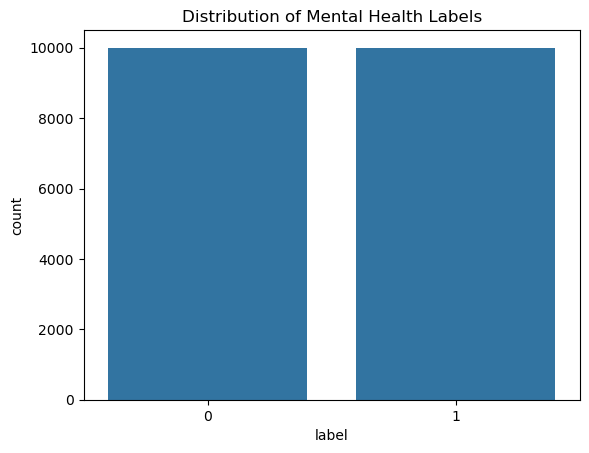

In [7]:
sns.countplot(x=df['label'])
plt.title('Distribution of Mental Health Labels')
plt.show()

Word Cloud of Mental Health Posts Before Cleaning

This code generates a word cloud from the combined text in the 'post_text' column, visually representing the most frequent words in the dataset

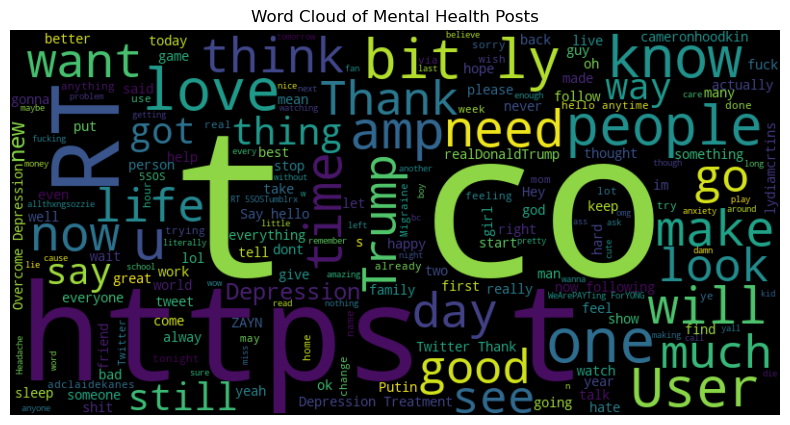

In [8]:
text = ' '.join(df['post_text'])
wordcloud = WordCloud(width=800, height=400, background_color = 'black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Mental Health Posts')
plt.show()

Checking for Missing Values

This command counts the number of missing values in each column, helping identify data quality issues in the dataset

In [9]:
df.isnull().sum()

post_created    0
post_text       0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

Checking for Duplicate Entries

This command counts the number of duplicate rows in the dataset, helping identify and remove redundant data.

In [10]:
df.duplicated().sum()

117

Removing Duplicate Entries

This command removes duplicate rows from the dataset, ensuring data quality and preventing redundancy.

In [11]:
df.drop_duplicates(inplace=True)

Dataset Dimensions

This command returns the number of rows and columns in the dataset, helping us verify its size after cleaning.

In [12]:
df.shape

(19883, 8)

Initialize Lemmatizer

This code initializes a lemmatizer to reduce words to their base forms and defines a set of stopwords to remove common words, improving text analysis.

In [13]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Text Preprocessing Function

This function cleans and processes text data to enhance analysis. It converts text to lowercase and removes URLs, hashtags, mentions, and retweet indicators to eliminate unnecessary elements. Special characters and punctuation are also removed, ensuring a cleaner dataset. The text is then tokenized into individual words, after which stopwords are filtered out.Lemmatization is applied to reduce words to their base forms making the text more uniform and meaningful for further processing.

In [14]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\brt\b', '', text)
    text = re.sub(r'\W+', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
    return ' '.join(words)

Applying Text Preprocessing to the Dataset

This command applies the preprocess_text function to the 'post_text' column, ensuring all text data is cleaned, tokenized, lemmatized, and free from unnecessary elements for further analysis.

In [15]:
df['post_text'] = df['post_text'].apply(preprocess_text)

In [16]:
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,2 year since diagnosed today taking moment ref...,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,sunday need break planning spend little time p...,84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,awake tired need sleep brain idea,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,bear make perfect gift great beginner get stit...,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,hard say whether packing list making life easi...,84,211,251,837,1,1


Generating a Word Cloud from Cleaned Text

This code combines all preprocessed text from the post_text column into a single string and generates a word cloud, visually highlighting the most frequently used words. The resulting word cloud helps identify key themes and patterns in the dataset.

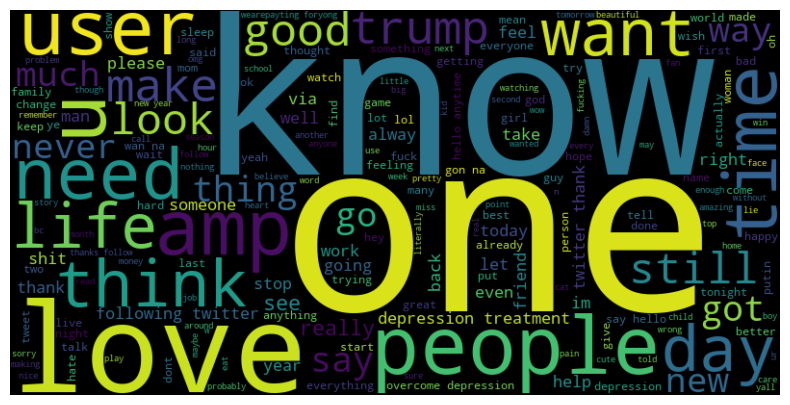

In [17]:
text = ' '.join(df['post_text'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TF-IDF Feature Extraction

This code uses TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization to convert the cleaned text into numerical features. The TfidfVectorizer extracts the top 5,000 most important words, assigning weights based on their importance in the dataset. The transformed data is then converted into a DataFrame for better visualization, where each column represents a word, and each row corresponds to a text entry with its respective TF-IDF scores.

In [18]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['post_text'])

tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

tfidf_df.head()

,00,000,02,03,08,10,100,1000,100th,101,...,zimmermann,zink,znati,zone,zquad,zsa,zurab,zyl,和夫,松元
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Counting Label Occurrences


This command calculates and displays the frequency of each label in the dataset, helping identify class distribution and potential imbalances.

In [19]:
label_counts = df['label'].value_counts()
print(label_counts)

label
1    9944
0    9939
Name: count, dtype: int64


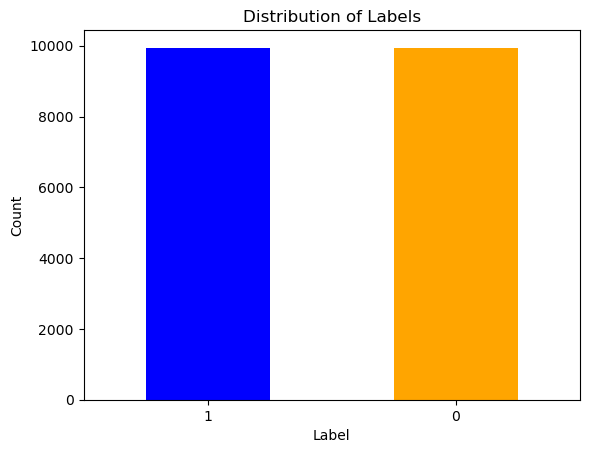

In [20]:
# Plot the counts
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=0)
plt.show()

Defining Features and Target Variable

This code sets X as the TF-IDF-transformed text data and y as the target labels, preparing the dataset for model training and evaluation.

In [21]:
X = tfidf_df
y = df['label']

Splitting the Dataset

This command splits the dataset into training (80%) and testing (20%) sets using train_test_split. The random_state=42 ensures reproducibility, meaning the split will be the same every time the code runs.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Verifying Dataset Split

This command prints the shapes of the training and testing sets, confirming the number of samples and features in each subset after splitting.

In [23]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (15906, 5000)
Testing set shape: (3977, 5000)


Training a Logistic Regression Model


This code initializes a Logistic Regression model with a maximum of 1000 iterations to ensure convergence. The model is then trained using the TF-IDF-transformed training data (X_train) and corresponding labels (y_train).

In [24]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Making Predictions with Logistic Regression

This code uses the trained Logistic Regression model to predict labels for the test dataset (X_test) and stores the results in y_pred_log_reg. The predicted values represent the model’s classification of mental health labels.

In [25]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7498114156399296
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1974
           1       0.75      0.75      0.75      2003

    accuracy                           0.75      3977
   macro avg       0.75      0.75      0.75      3977
weighted avg       0.75      0.75      0.75      3977



In [27]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
cm

array([[1473,  501],
       [ 494, 1509]], dtype=int64)

In [28]:
# Initialize and train the model
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
nn.fit(X_train, y_train)

MLPClassifier(max_iter=300)

In [29]:
# Make predictions
y_pred_nn = nn.predict(X_test)
y_pred_nn

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

Neural Network Accuracy: 0.7384963540357053
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1974
           1       0.74      0.74      0.74      2003

    accuracy                           0.74      3977
   macro avg       0.74      0.74      0.74      3977
weighted avg       0.74      0.74      0.74      3977



In [31]:
# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7364847875282876
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      1974
           1       0.74      0.74      0.74      2003

    accuracy                           0.74      3977
   macro avg       0.74      0.74      0.74      3977
weighted avg       0.74      0.74      0.74      3977



In [34]:
svm_model = SVC(kernel='linear',random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [35]:
y_pred = svm_model.predict(X_test)

In [36]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7445
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      1974
           1       0.73      0.78      0.76      2003

    accuracy                           0.74      3977
   macro avg       0.75      0.74      0.74      3977
weighted avg       0.75      0.74      0.74      3977



In [ ]:
# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
# Define the model
rf = RandomForestClassifier(random_state=42)

In [46]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [47]:
# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
